In [1]:
'''
- around 74% of videos are correctly predicted.
- Deviation from actual start-time of answers from predicted start-time:
    (Effective-Error) (Has to be same as v1 as same segmented transcripts are used for QA)
    - Roberta model:
        - Average of 132s or 12.4% of video, 
        - Average of 37.6s or 3.4% of video, ignoring 20% of outliers
    - DistilBert model:
        - Average of 146s or 13.8% of video, 
        - Average of 52.2s or 4.9% of video, ignoring 20% of outliers
'''
''''''

''

In [2]:
import pandas as pd
from utils import *

In [3]:
qdset = pd.read_csv('../cc-dset-questions-v1.csv')
dsetDetails = pd.read_csv('../cc-dset-vid-details.csv')
quesdset = qdset.join(dsetDetails.set_index('Video_ID'), on='Video_ID')

In [4]:
tdset = pd.read_csv('../v2-results/cc-dset-results-videoIds-trnidx.csv')
edset = pd.read_csv('../v2-results/cc-dset-results-videoIds-extidx.csv')
bdset = pd.read_csv('../v2-results/cc-dset-results-videoIds-bothidx.csv')
rob_ansdset = pd.read_csv('../v2-results/cc-dset-results-ans-rob.csv')
dis_ansdset = pd.read_csv('../v2-results/cc-dset-results-ans-dis.csv')

Video Id retrieval results:

In [5]:
correctVideoIds = list(quesdset['Video_ID'])
#Below will be compared

Overall result:


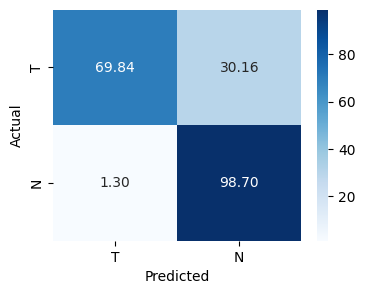

Confused pairs:  [[(202, 205), 20.0], [(201, 302), 14.29], [(303, 402), 13.16], [(202, 305), 12.82], [(301, 401), 11.11]]
Related Videos result:  [50.3, 49.7]


In [6]:
#Transcript Index
predictedVideoIds = list(tdset['Predicted_Video_ID'].astype('Int64'))
res = compareVidIds(correctVideoIds, predictedVideoIds)
print("Overall result:")
drawConfusionMatrix(res['totalResults'])
print("Confused pairs: ", res['confusedResults'])

relatedVideoIds = list(tdset['Related_Video_IDs'])
relRes = compareRelatedVids(correctVideoIds, predictedVideoIds, relatedVideoIds)
print("Related Videos result: ", relRes)

Overall result:


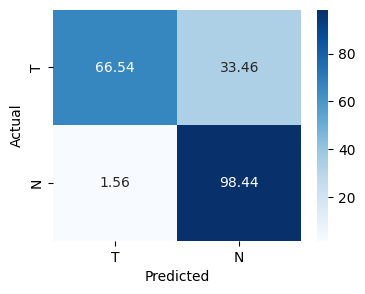

Confused pairs:  [[(104, 201), 30.0], [(303, 402), 13.16], [(301, 401), 11.11], [(102, 403), 11.11], [(201, 302), 10.71]]
Related Videos result:  [48.63, 51.37]


In [7]:
#Extracted-Text Index
predictedVideoIds = list(edset['Predicted_Video_ID'].astype('Int64'))
res = compareVidIds(correctVideoIds, predictedVideoIds)
print("Overall result:")
drawConfusionMatrix(res['totalResults'])
print("Confused pairs: ", res['confusedResults'])

relatedVideoIds = list(edset['Related_Video_IDs'])
relRes = compareRelatedVids(correctVideoIds, predictedVideoIds, relatedVideoIds)
print("Related Videos result: ", relRes)

Overall result:


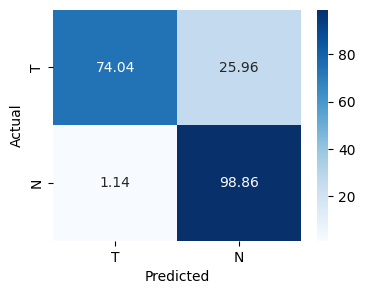

Confused pairs:  [[(201, 302), 14.29], [(303, 402), 13.16], [(104, 201), 12.5], [(202, 305), 10.26], [(205, 404), 9.52]]
Related Videos result:  [57.04, 42.96]


In [8]:
#Combined Index
predictedVideoIds = list(bdset['Predicted_Video_ID'].astype('Int64'))
res = compareVidIds(correctVideoIds, predictedVideoIds)
print("Overall result:")
drawConfusionMatrix(res['totalResults'])
print("Confused pairs: ", res['confusedResults'])

relatedVideoIds = list(bdset['Related_Video_IDs'])
relRes = compareRelatedVids(correctVideoIds, predictedVideoIds, relatedVideoIds)
print("Related Videos result: ", relRes)

Answer prediction results (Roberta):

In [9]:
dset = rob_ansdset.join(quesdset)
rightdset = dset[dset['Video_ID'] == dset['Predicted_Video_ID']]
rightdset.head()
#rightdset has only the rows with correct predicted IDs.

,Predicted_Video_ID,BestAnswer,BestAnswer_start,BestAnswer_end,LongAnswer,LongAnswer_start,LongAnswer_end,Related_Video_IDs,Video_ID,Question,Start_timestamp,Duration
0,101,an important topic in cloud computing security.,30,35,an important topic in cloud computing security...,30,43,NaN,101,What is authentication?,28,1081
1,101,identity provider for customers.,473,476,Keystone acts as the identity provider for cus...,470,476,NaN,101,What is Keystone?,54,1081
2,101,an abstraction used by other open stack servic...,80,93,a project is an abstraction used by other open...,80,93,NaN,101,What is a project in Keystone?,80,1081
3,101,identity provider for customers.,473,476,provides the actors identities in the cloud. I...,422,476,NaN,101,What is the fundamental purpose of the keystone?,92,1081
4,101,that the user or user group has some kind of a...,115,126,that the user or user group has some kind of a...,115,126,NaN,101,What does assigning role to a user or user gro...,113,1081


100% Mean: 12.6
80% Mean: 3.17


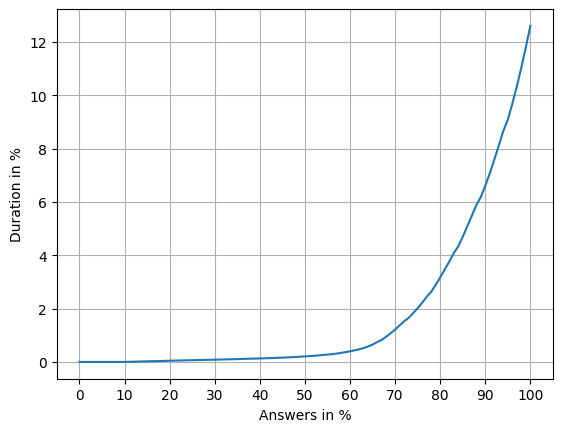

100% Mean: 132.86
80% Mean: 35.43


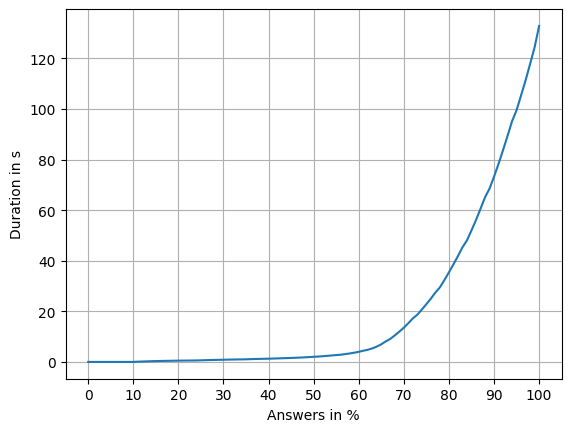

In [10]:
#Best-Answers
errs = list((abs(rightdset['Start_timestamp']-rightdset['BestAnswer_start'])*100)/rightdset['Duration'])
showAvgPlots(errs, ylabel='Duration in %')
errs = list(abs(rightdset['Start_timestamp']-rightdset['BestAnswer_start']))
showAvgPlots(errs, ylabel='Duration in s')

100% Mean: 12.26
80% Mean: 3.28


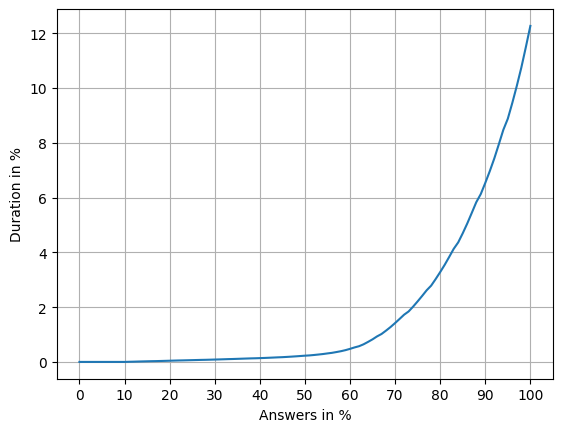

100% Mean: 131.1
80% Mean: 35.98


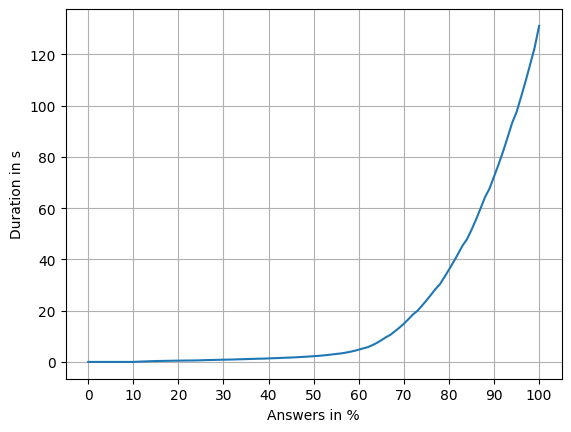

In [11]:
#Long-Answers
errs = list((abs(rightdset['Start_timestamp']-rightdset['LongAnswer_start'])*100)/rightdset['Duration'])
showAvgPlots(errs, ylabel='Duration in %')
errs = list(abs(rightdset['Start_timestamp']-rightdset['LongAnswer_start']))
showAvgPlots(errs, ylabel='Duration in s')

100% Mean: 12.43
80% Mean: 3.41


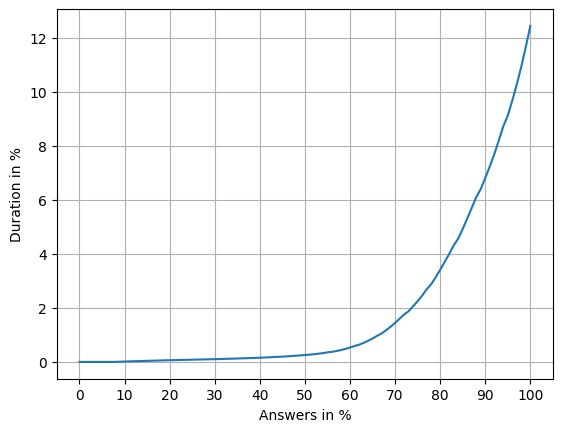

100% Mean: 131.98
80% Mean: 37.56


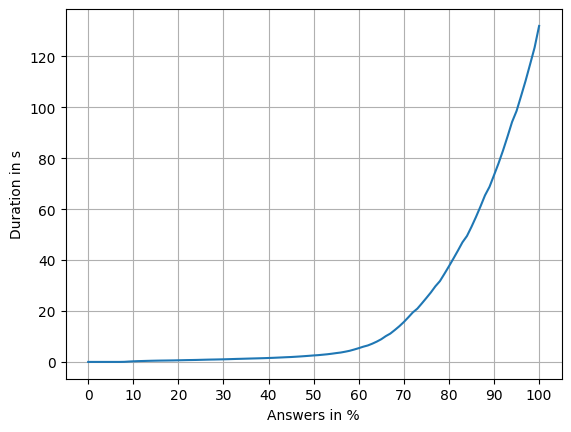

In [12]:
#Effective-Error
prob1 = 0.5 #to choose best
prob2 = 0.5 #to choose worst
errs1 = list((abs(rightdset['Start_timestamp']-rightdset['BestAnswer_start'])*100)/rightdset['Duration'])
errs2 = list((abs(rightdset['Start_timestamp']-rightdset['LongAnswer_start'])*100)/rightdset['Duration'])
errs  = [min(errs1[i], errs2[i])*prob1 + max(errs1[i], errs2[i])*prob2 for i in range(len(errs1))]
showAvgPlots(errs, ylabel='Duration in %')
errs1 = list(abs(rightdset['Start_timestamp']-rightdset['BestAnswer_start']))
errs2 = list(abs(rightdset['Start_timestamp']-rightdset['LongAnswer_start']))
errs  = [errs1[i]*0.5 + errs2[i]*0.5 for i in range(len(errs1))]
showAvgPlots(errs, ylabel='Duration in s')

Answer prediction results (Distilbert):

In [13]:
dset = dis_ansdset.join(quesdset)
rightdset = dset[dset['Video_ID'] == dset['Predicted_Video_ID']]
rightdset.head()
#rightdset has only the rows with correct predicted IDs.

,Predicted_Video_ID,BestAnswer,BestAnswer_start,BestAnswer_end,LongAnswer,LongAnswer_start,LongAnswer_end,Related_Video_IDs,Video_ID,Question,Start_timestamp,Duration
0,101,let us understand authentication in the cloud....,8,24,let us understand authentication in the cloud....,8,58,NaN,101,What is authentication?,28,1081
1,101,identity provider for customers,473,476,the identity provider for customers,473,476,NaN,101,What is Keystone?,54,1081
2,101,an abstraction used by other open stack servic...,80,93,an abstraction used by other open stack servic...,80,93,NaN,101,What is a project in Keystone?,80,1081
3,101,identity provider for customers,473,476,acts as the identity provider for customers,470,476,NaN,101,What is the fundamental purpose of the keystone?,92,1081
4,101,the user or user group has some kind of access...,115,126,that the user or user group has some kind of a...,115,126,NaN,101,What does assigning role to a user or user gro...,113,1081


100% Mean: 13.43
80% Mean: 4.33


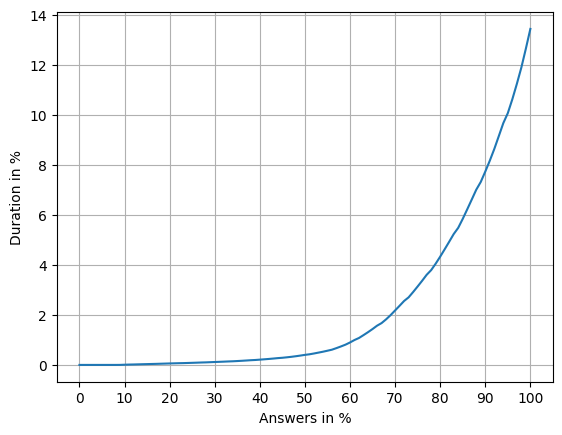

100% Mean: 142.87
80% Mean: 47.23


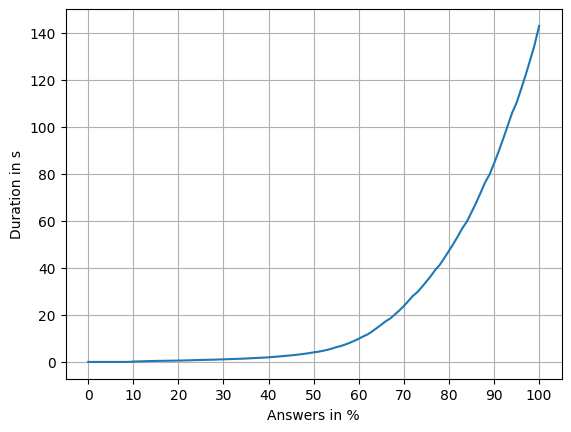

In [14]:
#Best-Answers
errs = list((abs(rightdset['Start_timestamp']-rightdset['BestAnswer_start'])*100)/rightdset['Duration'])
showAvgPlots(errs, ylabel='Duration in %')
errs = list(abs(rightdset['Start_timestamp']-rightdset['BestAnswer_start']))
showAvgPlots(errs, ylabel='Duration in s')

100% Mean: 14.22
80% Mean: 5.01


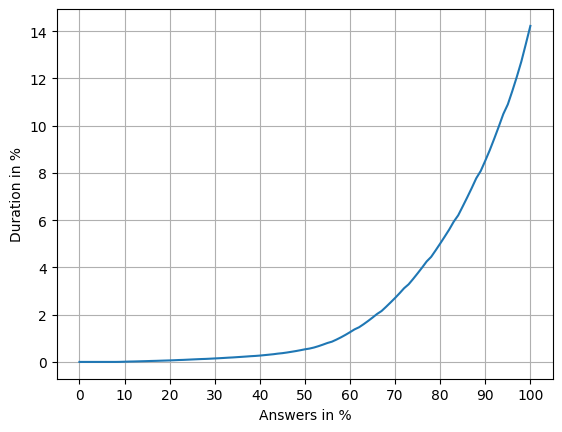

100% Mean: 149.04
80% Mean: 54.05


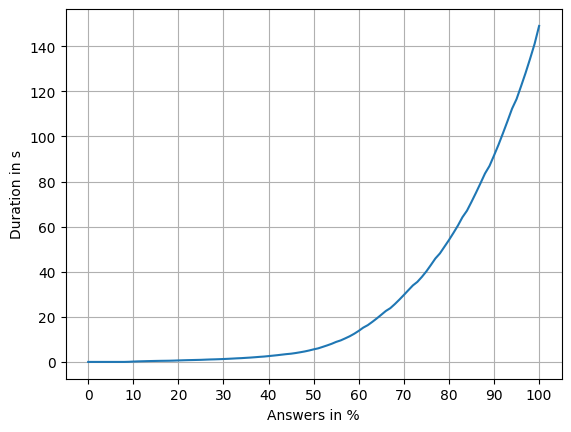

In [15]:
#Long-Answers
errs = list((abs(rightdset['Start_timestamp']-rightdset['LongAnswer_start'])*100)/rightdset['Duration'])
showAvgPlots(errs, ylabel='Duration in %')
errs = list(abs(rightdset['Start_timestamp']-rightdset['LongAnswer_start']))
showAvgPlots(errs, ylabel='Duration in s')

100% Mean: 13.83
80% Mean: 4.9


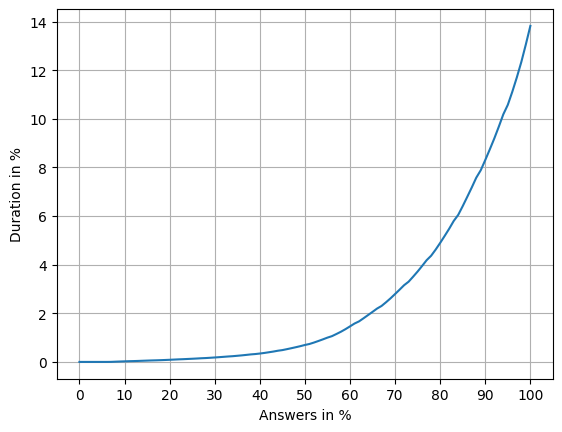

100% Mean: 145.96
80% Mean: 52.17


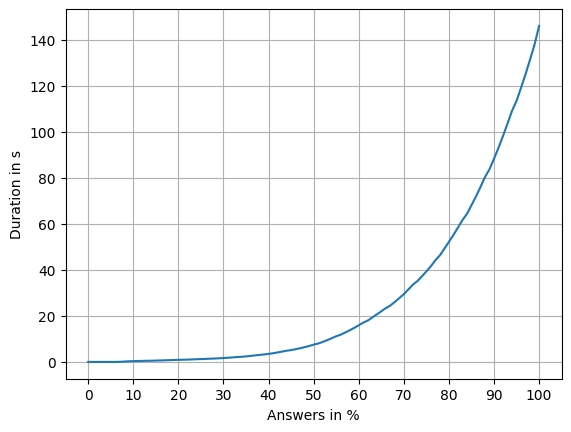

In [16]:
#Effective-Error
prob1 = 0.5 #to choose best
prob2 = 0.5 #to choose worst
errs1 = list((abs(rightdset['Start_timestamp']-rightdset['BestAnswer_start'])*100)/rightdset['Duration'])
errs2 = list((abs(rightdset['Start_timestamp']-rightdset['LongAnswer_start'])*100)/rightdset['Duration'])
errs  = [min(errs1[i], errs2[i])*prob1 + max(errs1[i], errs2[i])*prob2 for i in range(len(errs1))]
showAvgPlots(errs, ylabel='Duration in %')
errs1 = list(abs(rightdset['Start_timestamp']-rightdset['BestAnswer_start']))
errs2 = list(abs(rightdset['Start_timestamp']-rightdset['LongAnswer_start']))
errs  = [errs1[i]*0.5 + errs2[i]*0.5 for i in range(len(errs1))]
showAvgPlots(errs, ylabel='Duration in s')